In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
#import xgboost as xgb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pointbiserialr
import math

In [2]:
CO2entropy = 'entropy.csv'
entropy = pd.read_csv(CO2entropy)
entropy = entropy.iloc[:,1]
#print(entropy)

CO2year = 'CO2year.csv'
year = pd.read_csv(CO2year)

CO2_Comprehensive_Data = 'Climate Change Analysis/Datasets/Stage 1/Gas Concentration/co2_concentration.csv'
CO2csv = pd.read_csv(CO2_Comprehensive_Data)
CO2_x = year

In [3]:
flux = 'flux.csv'
flux = pd.read_csv(flux)
flux = flux.iloc[:,1]
#print(entropy)

fluxyear = 'fluxYear.csv'
year = pd.read_csv(fluxyear)

flux = flux.to_numpy()
fluxRefined = list()
for i in flux:
    fluxRefined.append(i/1000)
    
#print(fluxRefined)

In [4]:
forcing = 'Climate Change Analysis/Datasets/Stage 1/Radiative Forcing/Global_Mean_Net_Radiative_Forcing.csv'
Forcing = pd.read_csv(forcing)
forcing = Forcing.iloc[:,1]
fyear = Forcing.Year

In [5]:
emission_model = GradientBoostingRegressor(random_state=1)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

class regression:
        
    def predict(self, X, y, pred):
        emission_model.fit(X, y)
        print(X.head())
        print("Predictions: ")
        print(emission_model.predict(pred))
        train_pred = emission_model.predict(pred)
    
        #print(high_price_model.predict(108.000, 3477599.0))
        training_predictions = pd.DataFrame({'predictions': train_pred})
        #firstPred = cycloneData.join(training_predictions)
        #print(cycloneData.join(training_predictions))
        print(training_predictions)

        #print("Prediction Error: ")
        #mean_absolute_error(y, train_pred)
        
    def validate(self, X, y, mln):
        train_x, val_x, train_y, val_y = train_test_split(X, y, random_state = 0)
        validation_model = RandomForestRegressor()
        validation_model.fit(train_x, train_y)
        mean_absolute_error(val_y, validation_model.predict(val_x))
        
        fitting_model = GradientBoostingRegressor(max_leaf_nodes = mln, random_state = 0)
        fitting_model.fit(train_x, train_y) 
        mae = mean_absolute_error(val_y, fitting_model.predict(val_x))
        return(str(mae))
    
class check_Least:
    def __init__(self):
        self.least = 111111111111111111111111111111111111111111111111111110
    def iteration(self, m): 
        for x in m:
            #for i in candidate_max_leaf_nodes:
                if(x <= self.least):
                    self.least = x
                else:
                    continue
        return(m.index(self.least))
    
model = regression()
checkFit = check_Least()

In [6]:
model.predict(year[105:], fluxRefined[106:], CO2_x)

mae_array = list()
mae = list()
for mln in [5, 25, 50, 75, 100, 150, 300, 500, 1000, 5000]:
    #print("Max Leaf Nodes: " + str(mln))
    mae_array.append(model.validate(year[105:], fluxRefined[106:], mln))
    #print(mae_array)
    for i in mae_array:
        mae.append(float(i))
        
m = list()
m = mae
#print(m)

candidate_leaf_nodes = [5, 25, 50, 75, 100, 150, 300, 500, 1000, 5000]
#print(checkFit.iteration(m))
index = checkFit.iteration(m)
#print(candidate_leaf_nodes[index])
#print(" ")
#print("Max Leaf Node Size: " + str(best_tree_size))

final_model = GradientBoostingRegressor(max_leaf_nodes = 100, random_state = 0)
final_model.fit(year[105:], fluxRefined[106:])

valid_pred = final_model.predict(CO2_x)
print(valid_pred)
pd.DataFrame(valid_pred).to_csv("./fluxPred.csv")

     1851
105  1957
106  1958
107  1959
108  1960
109  1961
Predictions: 
[3.73457685 3.83419007 5.34639562 2.82388716 4.55475081 4.68782361
 4.162107   4.38194828 4.29326949 3.13166387 4.76439032 2.83457889
 3.66614244 2.78402232 2.97917988 3.36723466 3.39440536 3.39440536
 2.87291691 3.26087831 3.74368234 4.1272506  3.9020299  2.49718608
 2.49718608 3.48463757 3.48463757 2.72839838 2.6909768  3.9983966
 4.28732257 3.85753228 2.8787908  3.22050513 2.69085778 2.59399046
 5.61372692 4.98272549 3.10377358 4.96275392 4.96275392 4.43036519
 4.37796902 3.7669552  5.26204484 5.89765447 6.10103978 3.77485815
 3.71211813 4.54876546 3.49555721 4.8711359  4.55343819 4.55343819
 2.67535567 3.35417295 3.35417295 4.73518494 5.84821972 4.6656894
 4.6656894 ]
    predictions
0      3.734577
1      3.834190
2      5.346396
3      2.823887
4      4.554751
5      4.687824
6      4.162107
7      4.381948
8      4.293269
9      3.131664
10     4.764390
11     2.834579
12     3.666142
13     2.784022
14   

C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-pa

[3.65650541 3.82610291 5.5926874  2.63579519 4.43735127 5.04141124
 3.85785297 4.6651182  4.37428974 3.03207397 4.88380361 2.97602681
 3.63719963 2.68129799 2.90139388 3.27506347 3.42725554 3.55267005
 2.37145775 3.19968196 3.8469472  4.59432722 3.98561671 2.37072088
 1.88594166 3.61456442 3.66496185 2.61207525 2.56651461 4.00724477
 4.44834823 3.90379008 2.66411662 3.34659895 2.62104329 2.49627078
 5.94243013 5.13918847 2.81879838 5.3015105  5.23535107 4.33746235
 4.28467547 3.50337642 5.3012305  6.00381804 6.18081171 3.75814222
 3.70179331 4.62379382 3.14267365 5.02936754 4.5101645  4.5101645
 2.60866053 3.32205184 3.24299529 4.76149874 5.93470662 4.6464615
 4.6464615 ]


In [7]:
model.predict(year[109:161], forcing[79:], CO2_x)

mae_array = list()
mae = list()
for mln in [5, 25, 50, 75, 100, 150, 300, 500, 1000, 5000]:
    #print("Max Leaf Nodes: " + str(mln))
    mae_array.append(model.validate(year[105:], fluxRefined[106:], mln))
    #print(mae_array)
    for i in mae_array:
        mae.append(float(i))
        
m = list()
m = mae
#print(m)

candidate_leaf_nodes = [5, 25, 50, 75, 100, 150, 300, 500, 1000, 5000]
#print(checkFit.iteration(m))
index = checkFit.iteration(m)
#print(candidate_leaf_nodes[index])
#print(" ")
#print("Max Leaf Node Size: " + str(best_tree_size))

fin_model = GradientBoostingRegressor(max_leaf_nodes = 100, random_state = 0)
fin_model.fit(year[109:161], forcing[79:])
#print(valpred)

     1851
109  1961
110  1962
111  1963
112  1964
113  1965
Predictions: 
[ 0.48531419  0.48531419  0.48531419  0.38900045  0.20111925  0.12727853
 -0.62459154 -1.1611547  -0.50499952  0.02508918  0.18910422  0.03368345
 -0.03865644  0.34728376  0.55261159  0.59218998  0.56825214  0.47479121
  0.13007736  0.49315102  0.76545391  0.8116473   0.84734979  0.98937136
  1.00654362 -0.09781126 -0.52966681  0.43162106  0.85425221  0.92006648
  1.04087472  1.19914605  1.35479216  1.3634291   0.29056147 -1.25184471
  0.33201049  1.01121612  1.2603111   1.33090242  1.37331185  1.50903796
  1.59641563  1.60246857  1.60246857  1.60246857  1.5363412   1.5363412
  1.48238378  1.51257715  1.54948512  1.58049969  1.57817506  1.64395494
  1.64395494  1.64395494  1.64395494  1.64395494  1.64395494  1.64395494
  1.64395494]
    predictions
0      0.485314
1      0.485314
2      0.485314
3      0.389000
4      0.201119
5      0.127279
6     -0.624592
7     -1.161155
8     -0.505000
9      0.025089
10     

C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-pa

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=100, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg1 = LinearRegression().fit(CO2_x, valid_pred)
y_pred = reg1.predict(CO2_x)
reg1.score(CO2_x, valid_pred)
#print(y_pred)
print(y2_pred[30])

NameError: name 'y2_pred' is not defined

          entropy          mole   atm_entropy         Year
count  271.000000  2.710000e+02  2.710000e+02   271.000000
mean    13.913352  1.603026e+16  2.229742e+17  1885.000000
std      0.002443  1.682362e+15  2.351712e+16    78.375166
min     13.908227  1.460000e+16  2.030000e+17  1750.000000
25%     13.913301  1.490000e+16  2.070000e+17  1817.500000
50%     13.913902  1.540000e+16  2.140000e+17  1885.000000
75%     13.913902  1.635000e+16  2.280000e+17  1952.500000
max     13.922877  2.170000e+16  3.020000e+17  2020.000000


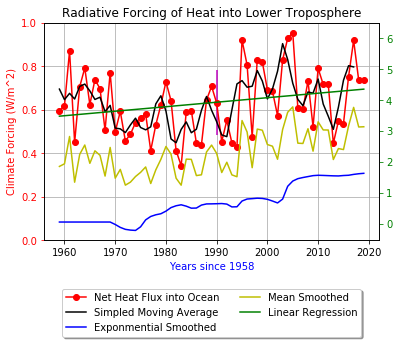

In [44]:
# Observation of Relation between CO2 entropy and PDI
from scipy.interpolate import spline
valpred = fin_model.predict(CO2_x)
pd.DataFrame(valpred).to_csv("./forcePred.csv")

ent = 'Climate Change Analysis/Datasets/Stage 1/Gas Concentration/New Datasets/entropyFinal.csv'
ent = pd.read_csv(ent)
#print(GHGcsv)
print(ent.describe())

e = ent.atm_entropy

year = ent.Year
#time = SSTcsv.time
#features = ['Year', 'time']
#SST_X = SSTcsv[features]


reg2 = LinearRegression().fit(CO2_x, valpred)
y2_pred = reg2.predict(CO2_x)
reg1.score(CO2_x, valpred)

st1 = np.std(valid_pred)
st2 = np.std(valpred)

def expMovAvg(values, window):
    weights = np.exp(np.linspace(-1.,0.,window))
    weights /= weights.sum()
    
    a = np.convolve(values,weights)[:len(values)]
    a[:window]=a[window]
    return a

def movAvg(values, window):
    weights = np.repeat(1.0, window) /window
    smas = np.convolve(values,weights,'valid')
    return smas

y_simr = movAvg(valid_pred, 1)
y_sim = movAvg(valid_pred, 3)
#print(len(y_sim))

'''y_sm = list()
for i in range(191):
    sum = y_exp[i] + y_sim[i]
    avg = sum/2
    y_sm.append(avg)'''

x_smooth = np.linspace(CO2_x.min(), CO2_x.max(), 200)
#x_smoothTime = np.linspace(time[:61].min(), time[:61].max(), 200)
rad_smooth = expMovAvg(valpred, 10)#spline(CO2_x, valpred, x_smooth)
net_smooth = expMovAvg(valid_pred, 10)#spline(CO2_x, valid_pred, x_smooth)

data = np.array([y_simr, rad_smooth])
y_smr = np.average(data, axis=0)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#line1, = ax1.plot(year[209:271], e[209:271], label="Atmospheric Entropy due to CO2 Emissions (ΔS)", color="r")
#line2, = ax2.plot(CO2_x, valid_pred, label="Net Heat Flux into Ocean", color="r")
#line3, = ax2.plot(fyear[79:], forcing[79:], label="Net Radiative Forcing", color="r")
line4, = ax2.plot(CO2_x, valid_pred, marker='o', label="Net Heat Flux into Ocean", color="r")
#line4, = ax2.plot(CO2_x, valpred, marker='o', label="Radiative Forcing", color="r")
line7, = ax2.plot(CO2_x[:59], y_sim, label="Simpled Moving Average", color="k")
line5, = ax2.plot(CO2_x, rad_smooth, label="Exponmential Smoothed", color="b")
line6, = ax2.plot(CO2_x, y_smr, label="Mean Smoothed", color="y")
#line6, = ax2.plot(CO2_x, rad_smooth, label="Rad Smooth", color="k")
line8, = ax2.plot(CO2_x, y_pred, label="Linear Regression", color="g")
#line8, = ax2.plot(CO2_x, y2_pred, label="Linear Regression", color="g")

ax2.errorbar(1990, 3.920355904485703, yerr=st1, color="m")
#ax2.errorbar(1990, 0.8280023791190985, yerr=st2, color="c")

curves = [line4, line7, line5, line6, line8]

ax1.legend(curves, [curve.get_label() for curve in curves], loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)

plt.title('Radiative Forcing of Heat into Lower Troposphere')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1958', color='b')
ax1.set_ylabel('Climate Forcing (W/m^2)', color='r')
ax1.tick_params(axis='y', colors='r')
#ax2.set_ylabel('Climate Forcing (W/m^2)', color='g')

ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()



In [28]:
from scipy.stats import kendalltau
from scipy.stats import spearmanr
corrSpear, _ = spearmanr(valid_pred, e[209:270])
corrKendal, _ = kendalltau(valid_pred, e[209:270])
corrKend, _ = kendalltau(valpred, valid_pred)
corrSpe, _ = spearmanr(valpred, valid_pred)

corrSpear2, _ = spearmanr(valpred, valid_pred)
corrSpear4, _ = spearmanr(valpred, entropy[:61])
#corrSpear3, _ = spearmanr(y_pred, y2_pred)
corrKend, _ = kendalltau(valpred, valid_pred)

print('Spearman correlation (most favorable): %.3f' % corrKendal + ' *')
print('Spearman correlation (most favorable): %.3f' % corrSpear + ' *')


Spearman correlation (most favorable): 0.147 *
Spearman correlation (most favorable): 0.228 *


In [27]:
print((y_pred[60] - y_pred[0])/60)
print((y2_pred[60] - y2_pred[0])/60)

0.014563500816782416
0.03241500185747389


In [11]:
y_pred[0]

3.483450879982229

In [88]:
((y_pred[60] - y_pred[0])/y_pred[0])/60

0.004180768243488685

In [80]:
0.01456350081678437/y_pred[0]

0.004180768243489246

In [89]:
((y2_pred[60]-y2_pred[0])/y2_pred[0])/60

-0.22440652988892554

In [92]:
vMax = 'vMax.csv'
vMax = pd.read_csv(vMax)
vMax = vMax.iloc[:,1]

C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000194AC79BF28> has a label of '_line1' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


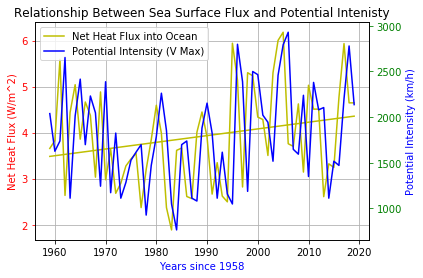

In [96]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1, = ax1.plot(CO2_x, valid_pred, label="Net Heat Flux into Ocean", color="y")
#line2, = ax2.plot(year[105:], fluxRefined[106:], label="Net Heat Flux into Ocean", color="g")
#line3, = ax2.plot(fyear[79:], forcing[79:], label="Net Radiative Forcing", color="y")
line6, = ax1.plot(CO2_x, y_pred, color="y")
line7, = ax2.plot(CO2_x, vMax[107:], label="Potential Intensity (V Max)", color="b")


curves = [line1, line6, line7]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Relationship Between Sea Surface Flux and Potential Intenisty')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1958', color='b')
ax1.set_ylabel('Net Heat Flux (W/m^2)', color='r')
ax1.tick_params(axis='y', colors='r')
ax2.set_ylabel('Potential Intensity (km/h)', color='b')
ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

In [98]:
corrSpear, _ = spearmanr(valid_pred, vMax[107:])
print(corrSpear)

0.20392293219078794
